# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [529]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
#import modelproject
from modelproject import BasicRamsey
from modelproject import GovernmentRamsey


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

Make sure you explain well the purpose of the model and comment so that other students who may not have seen it before can follow.  

In [530]:
# model setup
basic_model = BasicRamsey()

#par = basic_model.par
#ss = basic_model.ss
#path = basic_model.path


initializing the model:
calling .setup()
calling .allocate()


In [531]:
# Findeing the steady state, taking the K/Y steady state value as given.
basic_model.find_steady_state(KY_ss=4.0)


Y_ss = 1.0000
K_ss/Y_ss = 4.0000
rk_ss = 0.0714
r_ss = 0.0214
w_ss = 0.7144
A = 0.6664
beta = 0.9790


In [532]:
# setup the paths, as the steady state values.
# a. set initial value
basic_model.par.K_lag_ini = basic_model.ss.K

# b. set path
basic_model.path.A[:] = basic_model.ss.A
basic_model.path.C[:] = basic_model.ss.C
basic_model.path.K[:] = basic_model.ss.K

# checking that there are no errors in the Nonlinear equation system.
# c. check errors
errors_ss = basic_model.evaluate_path_errors()
assert np.allclose(errors_ss,0.0)

In [533]:
# There should not be anything to solve 
# start away from steady state
#basic_model.par.K_lag_ini = 0.50*basic_model.ss.K # start away from steady state

# persistent technology shock
#basic_model.par.K_lag_ini = basic_model.ss.K
#basic_model.path.A[:] = 0.95**np.arange(basic_model.par.Tpath)*0.1*basic_model.ss.A + basic_model.ss.A # shock path

# Future persistent technology shock
#H = 50
#basic_model.path.A[:] = basic_model.ss.A
#basic_model.path.A[H:] = 0.95**np.arange(basic_model.par.Tpath-H)*0.1*basic_model.ss.A + basic_model.ss.A


# Sudden permanent increase in A, 10 pct. 
# Warning permanent changes will mess with the steady state.
#basic_model.path.A[50:] = 1.1*basic_model.ss.A # shock path

basic_model.solve() # find transition path

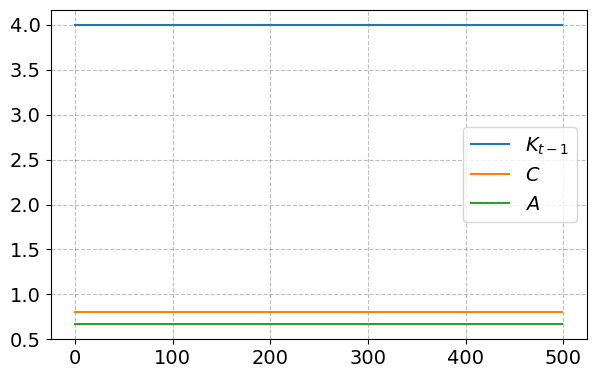

In [534]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(basic_model.path.K_lag,label=r'$K_{t-1}$')
ax.plot(basic_model.path.C,label=r'$C$')
ax.plot(basic_model.path.A,label=r'$A$')

ax.legend(frameon=True)
fig.tight_layout()

Govenment ramsey

$$
\begin{aligned}
G_t = \tau^k (1+r_t)N_{t-1} + \tau^w w_t
\end{aligned}
$$

$$
\begin{aligned}
U & =\max_{\{C_{t}\}_{t=0}^{\infty}}\sum_{t=0}^{\infty}\beta^{t}\frac{C_{t}^{1-\sigma}}{1-\sigma},\beta\in(0,1),\sigma>0\\
 & \text{s.t.}\\
 & M_{t}=(1+r_{t})N_{t-1}+w_{t}-G_t\\
 & M_{t}=(1-\tau^k)(1+r_{t})N_{t-1}+(1-\tau^w)w_{t}\\
 & N_{t}=M_{t}-C_{t}
\end{aligned}
$$

**Equilibrium:**

1. Households maximize utility
2. Firms maximize profits
3. Labor market clear: $E_{t}=L_{t}=1$
4. Goods market clear: $Y_{t}=C_{t}+I_{t}+G_{t}$
5. Asset market clear: $N_{t}=K_{t}$ and $r_{t}=r_{t}^{k}-\delta$
6. Capital follows its law of motion: $K_{t}=(1-\delta)K_{t-1}+I_{t} = (1-\delta)K_{t-1}+Y_t-C_t-G_t$

**Implication of profit maximization:** From FOCs

$$
\begin{aligned}
r_{t}^{k} & = F_{K}(K_{t-1},E_{t})=A_t \alpha K_{t-1}^{-\theta-1}Y_{t}^{-1}\\
w_{t} & = F_{E}(K_{t-1},E_{t})=A_t (1-\alpha)E_{t}^{-\theta-1}Y_{t}^{-1}
\end{aligned}
$$

**Implication of utility maximization:** From FOCs

$$
\begin{aligned}
C_{t}^{-\sigma}=(1-\tau_{t+1}^{k})\beta(1+r_{t+1})C_{t+1}^{-\sigma}
\end{aligned}
$$



$$
\begin{aligned}
H_{t}
=\left[\begin{array}{c}
C_{t}^{-\sigma}-(1-\tau_{t+1}^k)\beta(1+r_{t+1})C_{t+1}^{-\sigma}\\
K_{t}-[(1-\delta)K_{t-1}+Y_t-C_{t}-G_{t}]
\end{array}\right]
\end{aligned}
$$

In [535]:
# model setup
from modelproject import GovernmentRamsey
government_model = GovernmentRamsey()

initializing the model:
calling .setup()
calling .allocate()


In [536]:
government_model.find_steady_state(KY_ss=4.0)

Y_ss = 1.0000
K_ss/Y_ss = 3.9800
rk_ss = 0.0718
r_ss = 0.0218
w_ss = 0.7143
A = 0.6673
beta = 0.9787
G = 0.0210
C = 0.7800


In [537]:
# setup the paths, as the steady state values.
# a. set initial value
government_model.par.K_lag_ini = government_model.ss.K

# b. set path
government_model.path.A[:] = government_model.ss.A
government_model.path.C[:] = government_model.ss.C
government_model.path.K[:] = government_model.ss.K
government_model.path.G[:] = government_model.ss.G

# checking that there are no errors in the Nonlinear equation system.
# c. check errors
errors_ss = government_model.evaluate_path_errors()
#print(errors_ss)
#assert np.allclose(errors_ss,0.0)

In [538]:
government_model.par.K_lag_ini = government_model.ss.K # start away from steady state
government_model.solve() # find transition path

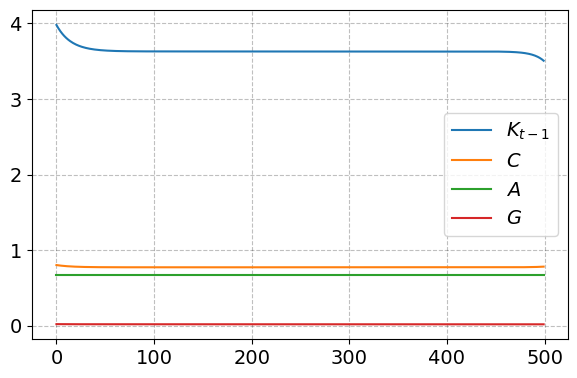

In [539]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model.path.K_lag,label=r'$K_{t-1}$')
ax.plot(government_model.path.C,label=r'$C$')
ax.plot(government_model.path.A,label=r'$A$')
ax.plot(government_model.path.G,label=r'$G$')

ax.legend(frameon=True)
fig.tight_layout()

Both sides now


In [540]:
basic_model.par.K_lag_ini = 0.50*basic_model.ss.K # start away from steady state
basic_model.solve()

In [541]:
government_model.par.K_lag_ini = 0.50*government_model.ss.K # start away from steady state
government_model.solve()

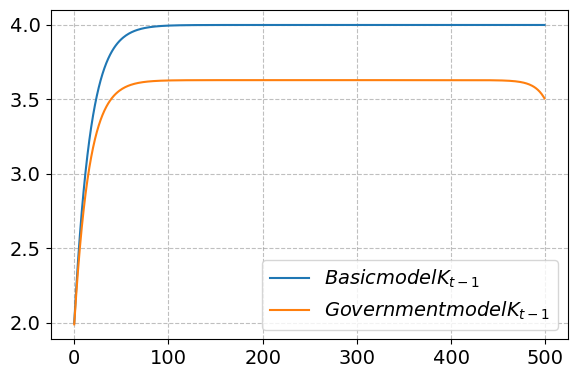

In [542]:
fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(basic_model.path.K_lag,label=r'$Basic  model K_{t-1}$')
ax.plot(government_model.path.K_lag,label=r'$Government model K_{t-1}$')

ax.legend(frameon=True)
fig.tight_layout()

## Analytical solution

initializing the model:
calling .setup()
calling .allocate()
Y_ss = 1.0000
K_ss/Y_ss = 3.9800
rk_ss = 0.0718
r_ss = 0.0218
w_ss = 0.7143
A = 0.6673
beta = 0.9787
G = 0.0210
C = 0.7800


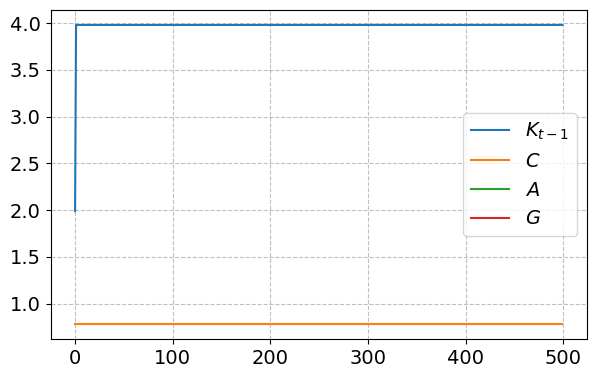

In [543]:

from modelproject import test2
government_model = test2()

government_model.find_steady_state(KY_ss=4.0)


government_model.par.K_lag_ini = 0.5*government_model.ss.K # start away from steady state
government_model.solve() # find transition path


fig = plt.figure(figsize=(6,6/1.5))
ax = fig.add_subplot(1,1,1)
ax.plot(government_model.path.K_lag,label=r'$K_{t-1}$')
ax.plot(government_model.path.C,label=r'$C$')
ax.plot(government_model.path.A,label=r'$A$')
ax.plot(government_model.path.G,label=r'$G$')

ax.legend(frameon=True)
fig.tight_layout()

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 